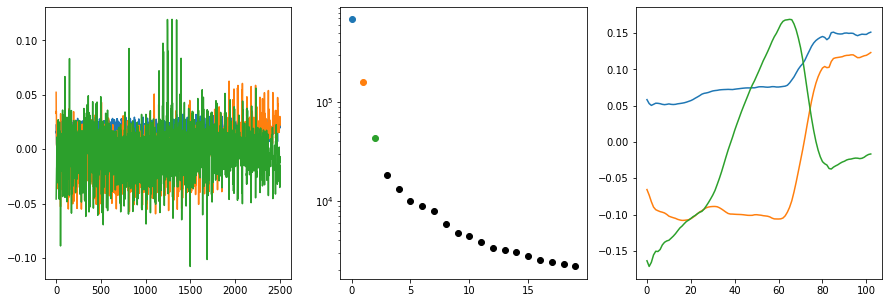

In [3]:
import numpy as np
import chemometrics as cm
import chemometrics.mcr.constraint as constraint
import chemometrics.mcr as mcr
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import TruncatedSVD


x_lim = 100
y_lim = 100
spectra = loadmat('PaviaU.mat')['paviaU'][:x_lim:2, :y_lim:2, :]
groundtruth = loadmat('PaviaU_gt.mat')['paviaU_gt'][:x_lim:2, :y_lim:2]

linearized = np.reshape(spectra, [-1, spectra.shape[-1]])

cm.plot_svd(linearized[::,:], n_comp=3)

(-100.0, 100.0)

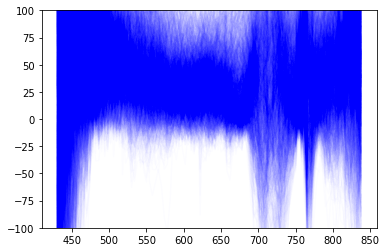

In [25]:
svd = TruncatedSVD(n_components=2).fit(linearized)



emsc = cm.Emsc(p_order=1, background=svd.components_.T)
scaler = StandardScaler(with_std=False)


wavelength = np.arange(430, 839, 4)

pretreated = emsc.fit_transform(linearized[:, :])

lines = plt.plot(wavelength, pretreated.T, alpha=0.01, c='b')
plt.ylim([-100, 100])

In [12]:
svd.components_.shape

(2, 103)

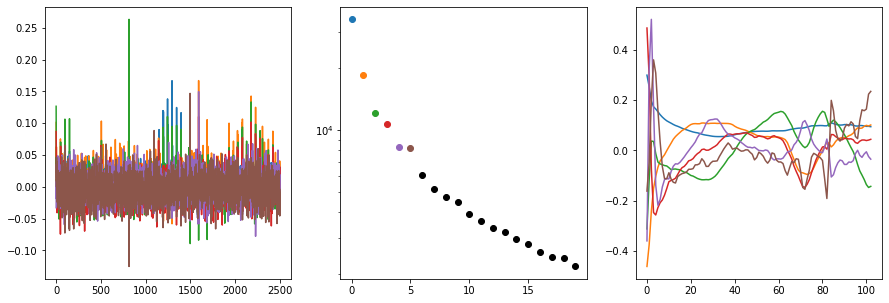

In [24]:
cm.plot_svd(pretreated, n_comp=6)

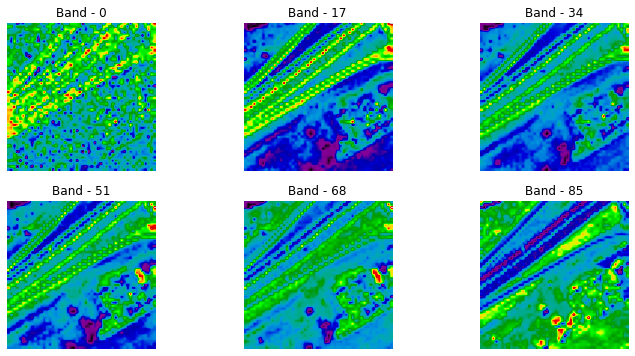

In [19]:
fig = plt.figure(figsize = (12, 6))

n_subplots = 6

for i in range(0, n_subplots):
    fig.add_subplot(2,3, i+1)
    q = int(np.floor(spectra.shape[2]/n_subplots))*i
    plt.imshow(spectra[:,:,q], cmap='nipy_spectral')
    plt.axis('off')
    plt.title(f'Band - {q}')

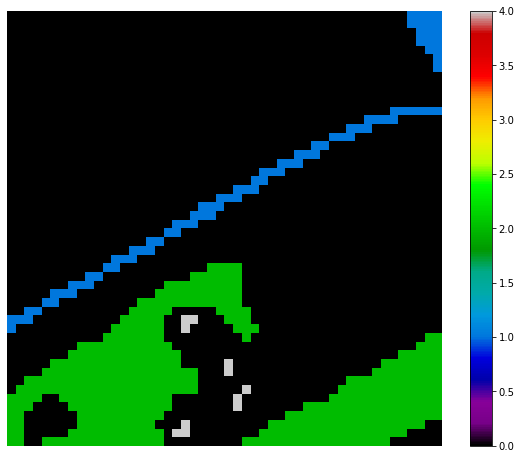

In [47]:
plt.figure(figsize=(10, 8))
plt.imshow(groundtruth, cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
plt.show()